In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pykrx import stock

pd.options.display.float_format = '{:.5f}'.format  # 지수표현 없이 출력
# pd.reset_option('display.float_format')          # 되돌리기

In [2]:
# 20100101 ~ 20210831 KOSPI 지수
df = stock.get_index_ohlcv_by_date("20100101", "20210831", '1001') 

In [3]:
# 날짜가 index로 되어있어서 column화
df = df.reset_index()

In [4]:
# 필요 컬럼만 남기기(날짜, 종가)
df = df[['날짜','종가']]

In [5]:
# 월별 마지막 날짜(last_day) 컬럼 만들기
df['yyyymm'] = df.날짜.astype(str).apply(lambda x: x.replace("-","")[:6])
df['day'] = df.날짜.astype(str).apply(lambda x: x.replace("-","")[6:]).astype(int)
temp = df.groupby("yyyymm").day.max()
temp = pd.DataFrame(temp)
temp.columns = ['last_day']
df = pd.merge(df,temp,on='yyyymm')

In [6]:
# 월별 마지막 일자 데이터만 남기기
df = df[df.day==df.last_day]
df.reset_index(drop=True, inplace=True)

In [7]:
df['기간수익률'] = 0.0

for idx, data in df.iterrows() :
    if idx < 12:
        continue
    else:
        df.loc[idx,'기간수익률'] = (data['종가'] / df.loc[idx-12,'종가'] - 1) * 100

In [8]:
# 캡스톤 프로젝트에서 사용할 2011년부터 데이터만 남기기
df = df.iloc[12:,:]
df.reset_index(drop=True, inplace=True)
KOSPI_RETURNS = df[['날짜','yyyymm','종가','기간수익률']]
KOSPI_RETURNS.set_index('날짜',inplace=True, drop=True)
KOSPI_RETURNS.columns = ['yyyymm','close_price','one_y_returns']

In [9]:
KOSPI_RETURNS

,yyyymm,close_price,one_y_returns
날짜,,,
2011-01-31,201101,2069.73000,29.16196
2011-02-28,201102,1939.30000,21.61823
2011-03-31,201103,2106.70000,24.44694
2011-04-29,201104,2192.36000,25.88484
2011-05-31,201105,2142.47000,30.53892
...,...,...,...
2021-04-30,202104,3147.86000,61.63096
2021-05-31,202105,3203.92000,57.85968
2021-06-30,202106,3296.68000,56.36452


In [10]:
KOSPI_RETURNS.describe()

,close_price,one_y_returns
count,128.00000,128.00000
mean,2153.91211,5.98157
std,316.52076,16.71391
min,1754.64000,-19.56623
25%,1977.58000,-3.15922
50%,2032.45000,1.13658
75%,2204.99750,11.52915
max,3296.68000,74.47568


# 시각화

In [11]:
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False 

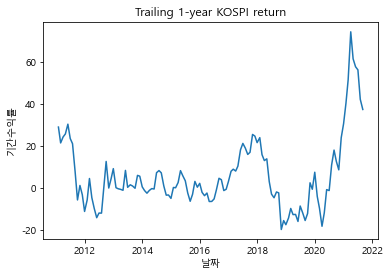

In [12]:
plt.plot(KOSPI_RETURNS.one_y_returns)
plt.title('Trailing 1-year KOSPI return')
plt.xlabel('날짜')
plt.ylabel('기간수익률')
plt.show()

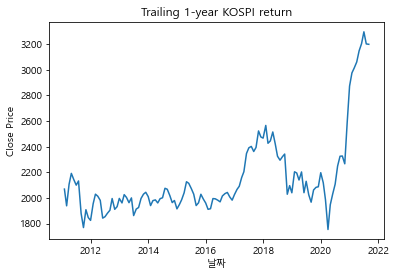

In [13]:
plt.plot(KOSPI_RETURNS.close_price)
plt.title('Trailing 1-year KOSPI return')
plt.xlabel('날짜')
plt.ylabel('Close Price')
plt.show()
